In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"Each column shows an analysis of an injected transiting shape around a sector 18, magnitude 12.8186 star: TIC 251630511. This star was chosen because of its relatively\nless noisy lightcurve with few dips or flares. The first row shows injected shapes of varying depths, with roughly linearly increasing areas. There are 12 different depths for circles \nand squares, and 6 for triangles which only go up to areas that can be contained within the star's area. \n\nThe middle row shows M statistic versus event depth. The M statistic is a measure of how much of the lightcurve varies from the median. A positive M means that the lightcurve dips much lower than the median. As the event \ndepth increases, the M statistic increases.\n\nThe M statistic is one of the most important of the 61 parameters that determine a lightcurve's anomaly score.\n\nThe last row shows a each lightcurve's anomaly score with respect to its event depth. Deeper events are ranked as more anomalous, and closer to rank 1.

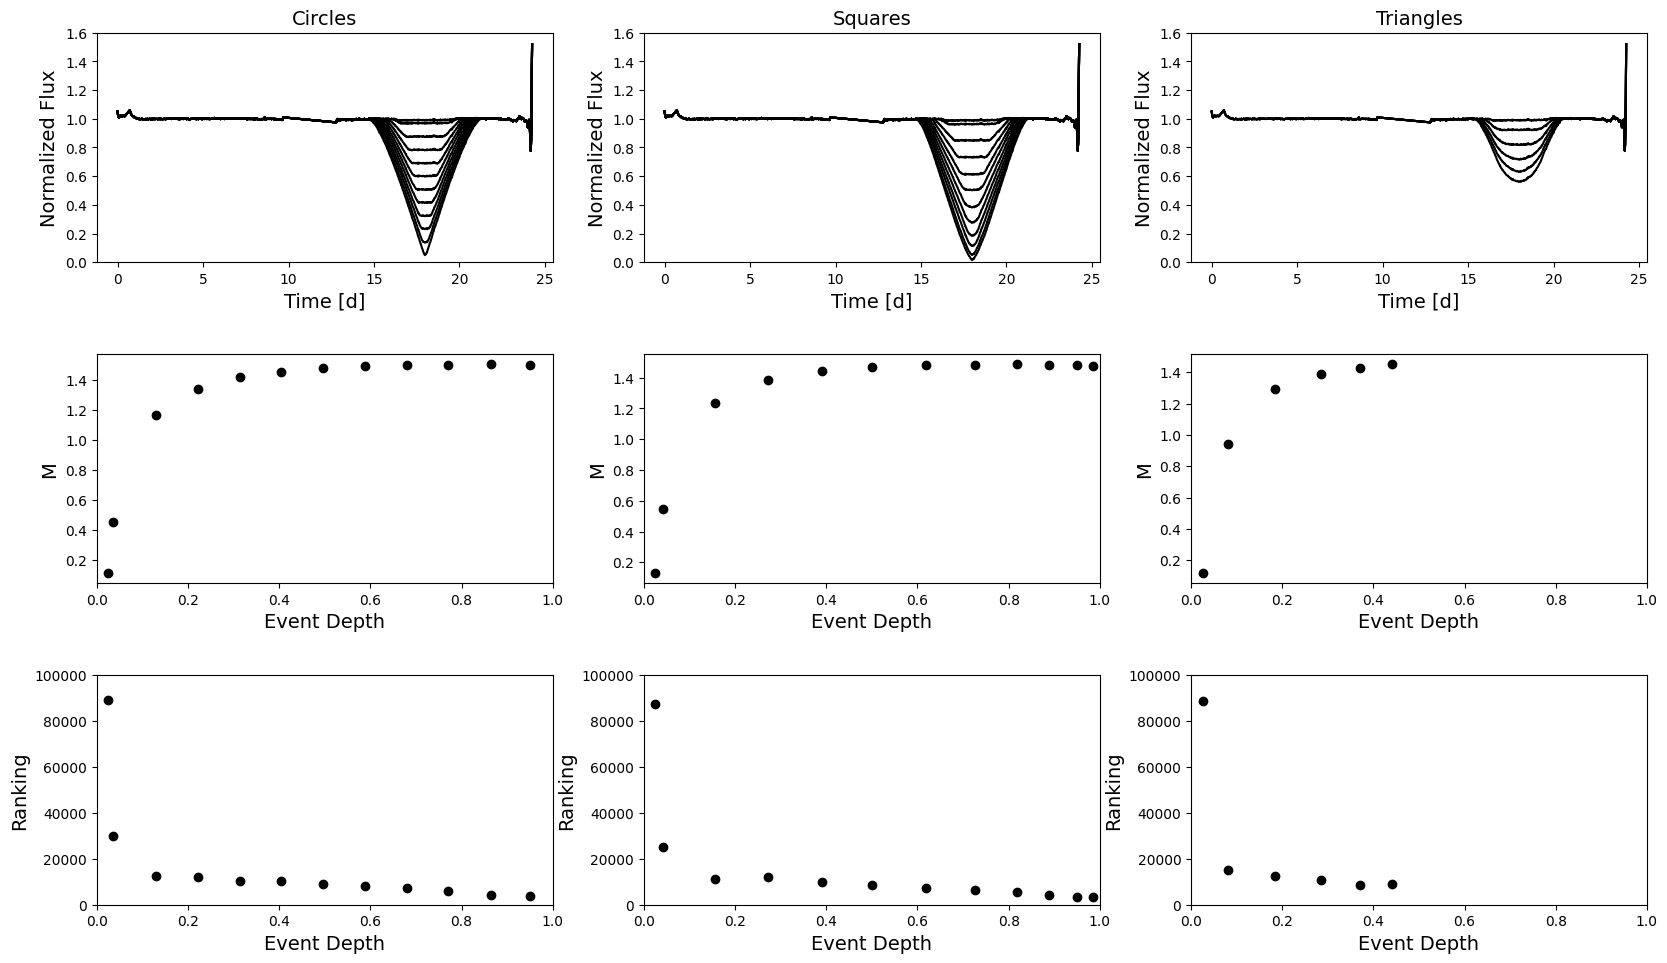

In [123]:
fig, axs = plt.subplots(3, 3,figsize=(20, 8))

shapes = ("Circle", "Square", "Triangle")


x=y=0
for shape in shapes:
    x=0
    df = pd.read_csv(shape + "_depth_spike.csv")
    for num in range(1,100):
        try:
            flux = df["Flux%s" %(num)].values
            axs[x, y].plot(df['Time'], flux, color = 'black')
        except:
            # Dan: this will stop the loop once it hits an unrecognized column
            break

    axs[x,y].set_xlabel('Time [d]', fontsize = 14)
    axs[x,y].set_ylabel('Normalized Flux', fontsize = 14)
    axs[x,y].set_title(shape + 's', fontsize = 14)

    axs[x, y].set_ylim(0, 1.6)
    # axs[x, y].set_xlim(-1, 28)
    x += 1
    depths = 1- df['Depths'].values
    #print(min(df['Mstats']))

    axs[x, y].scatter(depths, df['Mstats'], color = "black")
    axs[x,y].set_xlabel('Event Depth', fontsize = 14)
    axs[x,y].set_ylabel('M', fontsize = 14)
    axs[x, y].set_xlim(0, 1)
    x += 1
    df2 = pd.read_csv("rankings_depth_"+shape+ ".csv")
    depths = 1- df2['min_flux'].values

    axs[x, y].scatter(depths, df2['ranks'], color = "black")
    axs[x,y].set_xlabel('Event Depth', fontsize = 14)
    axs[x,y].set_ylabel('Ranking', fontsize = 14)    
    axs[x, y].set_xlim(0, 1)
    axs[x, y].set_ylim(0,100000)


    y += 1

fig.subplots_adjust(hspace=.4, top=1.2)

fig.savefig('shape_injection_depths.eps', format='eps')


#I'd explain the basics of what we're seeing, which TIC it is and why, as well as maybe note the values of the min/max M and rank.
'''Each column shows an analysis of an injected transiting shape around a sector 18, magnitude 12.8186 star: TIC 251630511. This star was chosen because of its relatively
less noisy lightcurve with few dips or flares. The first row shows injected shapes of varying depths, with roughly linearly increasing areas. There are 12 different depths for circles 
and squares, and 6 for triangles which only go up to areas that can be contained within the star's area. 

The middle row shows M statistic versus event depth. The M statistic is a measure of how much of the lightcurve varies from the median. A positive M means that the lightcurve dips much lower than the median. As the event 
depth increases, the M statistic increases.

The M statistic is one of the most important of the 61 parameters that determine a lightcurve's anomaly score.

The last row shows a each lightcurve's anomaly score with respect to its event depth. Deeper events are ranked as more anomalous, and closer to rank 1. 

For circles, the deepest transit has a maximum M statistic of 1.50 and is rank 3734. The minimum M statistic is .11 and ranks 89404.
For squares, the deepest transit has a maximum M statistic of 1.48 and is rank 3342. The minimum M statistic is .13 and ranks 87401.
For triangles, the deepest transit has a maximum M statistic of 1.45 and is rank 8618. The minimum M statistic is .12 and ranks 88889.'''
#could show scatter plot values in powerpoint


1.0600026661645086
1.115386084262569
1.1190916029211515


"The first row shows injected shapes of varying widths, with roughly linearly increasing transit times. There are 6 different widths for each shape.\n\nThe middle row shows M statistic versus event width. The M statistic is a measure of how much of the lightcurve varies from the median. A positive M means that the lightcurve dips much lower than the median. As the event \ndepth increases, the M statistic increases. The M statistic appears to increase and then decrease with increasing event width because wider transits lower the median, decreasing the M statistic.\n\nThe last row shows a each lightcurve's anomaly score with respect to its event width. The rankings resemble the M statistic values.\n\nFor circles, the maximum M statistic is 1.46 and is rank 4287. The minimum M statistic is 1.06 and ranks 12628.\nFor squares,  the maximum M statistic is 1.48 and is rank 4056. The minimum M statistic is 1.12 and ranks 12317.\nFor triangles, the maximum M statistic is 1.47 and is rank 3361. 

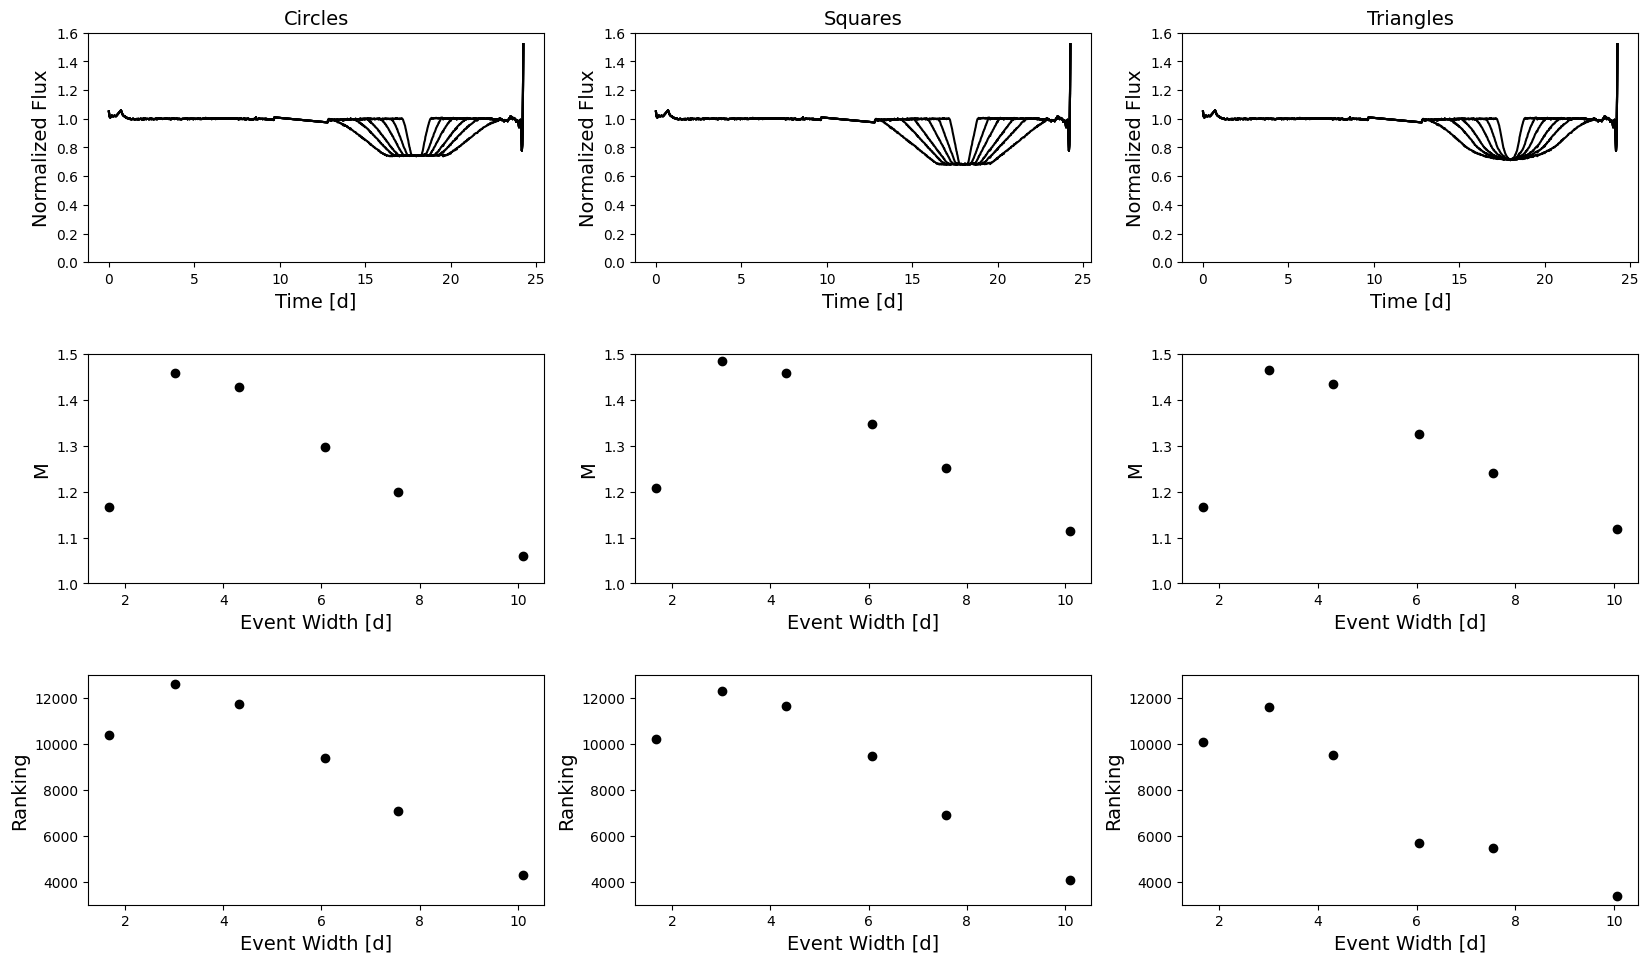

In [124]:
fig, axs = plt.subplots(3, 3,figsize=(20, 8))

shapes = ("Circle", "Square", "Triangle")


x=y=0
for shape in shapes:
    x=0
    df = pd.read_csv(shape + "_width_spike.csv")
    for num in range(1,100):
        try:
            flux = df["Flux%s" %(num)].values
            axs[x, y].plot(df['Time'], flux, color = 'black')
        except:
            # Dan: this will stop the loop once it hits an unrecognized column
            break

    axs[x,y].set_xlabel('Time [d]', fontsize = 14)
    axs[x,y].set_ylabel('Normalized Flux', fontsize = 14)
    axs[x,y].set_title(shape + 's', fontsize = 14)

    axs[x, y].set_ylim(0, 1.6)
    # axs[x, y].set_xlim(-1, 28)
    x += 1
    widths = df['Widths'][~np.isnan(df['Widths'])]
    #print(len(widths))
    #print(len(df2['ranks']))
    print(min(df['Mstats']))

    axs[x, y].scatter(df['Widths'], df['Mstats'], color = "black")
    axs[x,y].set_xlabel('Event Width [d]', fontsize = 14)
    axs[x,y].set_ylabel('M', fontsize = 14)
    axs[x, y].set_ylim(1, 1.5)
    #axs[x, y].set_xlim(0, 1)
    x += 1
    df2 = pd.read_csv("rankings_width_"+shape+ ".csv")
    axs[x, y].scatter(widths, df2['ranks'], color = "black")
    axs[x,y].set_xlabel('Event Width [d]', fontsize = 14)
    axs[x,y].set_ylabel('Ranking', fontsize = 14)    
    axs[x, y].set_ylim(3000, 13000)



    y += 1

fig.subplots_adjust(hspace=.4, top=1.2)

#print(df['Widths'])
#print(df['Mstats'])
#, color = "black")
fig.savefig('shape_injection_widths.eps', format='eps')


'''The first row shows injected shapes of varying widths, with roughly linearly increasing transit times. There are 6 different widths for each shape.

The middle row shows M statistic versus event width. The M statistic is a measure of how much of the lightcurve varies from the median. A positive M means that the lightcurve dips much lower than the median. As the event 
depth increases, the M statistic increases. The M statistic appears to increase and then decrease with increasing event width because wider transits lower the median, decreasing the M statistic.

The last row shows a each lightcurve's anomaly score with respect to its event width. The rankings resemble the M statistic values.

For circles, the maximum M statistic is 1.46 and is rank 4287. The minimum M statistic is 1.06 and ranks 12628.
For squares,  the maximum M statistic is 1.48 and is rank 4056. The minimum M statistic is 1.12 and ranks 12317.
For triangles, the maximum M statistic is 1.47 and is rank 3361. The minimum M statistic is 1.12 and ranks 11623.'''

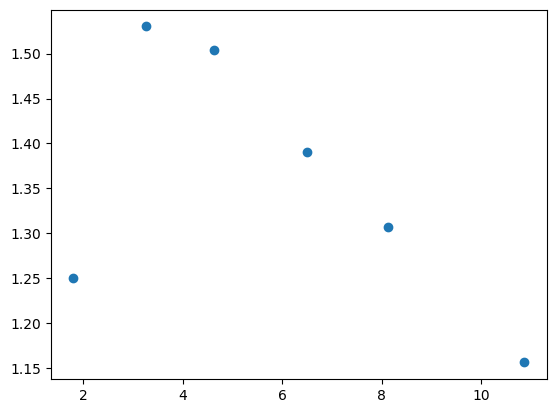

In [83]:

plt.scatter(df['Widths'],df['Mstats'])